# PSI3471 - Entrega 01 
### Fernando Zolubas Preto - NUSP: 10694192
### Vinícius Melo de Souza - NUSP: 10772272
# Regressão Linear 

Neste exercício queremos prever o preço de carros do _"Used Cars Dataset"_ do site `Craiglist.org`.

No caso, os dados já foram limpos e filtrados para facilitar o entendimento e o andamento do exercício, para conseguirmos dar foco na utilização da técnica dos mínimos quadrados. Os dados limpos estão em um arquivo CSV que podemos puxar do site da disciplina. Este arquivo será importado através da biblioteca "Panda" do python que foi instalada no computador previamente.

Com esses dados, queremos criar um _"DataFrame"_ que estaremos chamando de __cars_data__, que irá conter esses dados do arquivo CSV. Neste _DataFrame_ estaremos gerando os arrays NumPy para calcular os parâmetros do modelo de regressão linear.

Temos essas 9 colunas que se referem à:

- __Price__: O preço do carro. É o dado que desejamos obter com o modelo.
- __Year__: Ano do carro.
- __Condition__: Variável categórica que indica a condição do carro. Pode ter os valores _good_, _fair_, _excellent_, _like new_, _salvage_, ou _new_.
- __Cylinders__: Variável categórica que indica o número de cilindros do motor. Pode ter os valores _4 cylinders_ ou _6 cylinders_.
- __Fuel__: Variável categórica que indica o combustível do carro. Pode ter os valores _gas_ ou _diesel_.
- __Odometer__: Valor registrado no odômetro, em milhas.
- __Transmission__: Variável categórica que indica o tipo de transmissão. Pode ter os valores _automatic_ ou _manual_.
- __Size__: Variável categórica que indica o tamanho do carro. Pode ter os valores _compact_, _mid-size_, _sub-compact_ ou _full-size_.
- __Type__:	Variável categórica que indica o tipo do carro. Pode ter os valores _sedan_, _coupe_, _wagon_, ou _hatchback_.


Para usar os dados categóricos de forma numérica iremos estar utilizando variáveis _dummy_.

E por fim, para obter o vetor "wo" vamos seguir os seguintes passos.

1. Selecionar o conjunto de variáveis originais que vocễ vai utilizar no modelo.
2. Substituir cada variável categórica de sua seleção por um conjunto de variáveis dummy, conforme descrito anteriormente.
3. Transformar as variáveis originais de sua seleção e / ou incluir combinações, caso julgue necessário;
4. A partir de sua seleção de dados, obter a matriz X e o vetor d, que podem ser representados como arrays do NumPy.
5. Usando a matriz X e o vetor d, calcular o vetor wo e o erro quadrático médio conforme mostrado na aula.

# Nossa solução

1. Função de regressão linear

In [61]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1) Obtenção e tratamento dos dados

### 1.1) Obtenção dos da base de dados

Criando os data frames de treino e de teste a partir dos arquivos CSV "limpos" extraídos da base de dados _"Used Cars Dataset"_

In [56]:
cars_data = pd.read_csv("vehicles_cleaned_train.csv")
cars_data_teste = pd.read_csv("vehicles_cleaned_test.csv")

colNames_cars_data = cars_data.columns.tolist()
colNames_cars_data_teste = cars_data_teste.columns.tolist()

### 1.2) Análise preliminar da base de dados

In [9]:
cars_data.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan


In [10]:
cars_data_teste.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,11995,2018,excellent,4 cylinders,gas,19000,automatic,mid-size,sedan
1,20500,2017,excellent,6 cylinders,gas,68000,automatic,full-size,sedan
2,15800,2018,like new,4 cylinders,gas,41200,automatic,full-size,sedan
3,20980,2015,excellent,6 cylinders,gas,82845,automatic,mid-size,sedan
4,13999,2019,like new,4 cylinders,gas,29638,automatic,full-size,sedan


As dimensões da base de treinamento

In [15]:
print("(Numero de Linhhas, Numero de Colunas) = ", cars_data.shape)

(Numero de Linhhas, Numero de Colunas) =  (8338, 9)


As dimensões da base de teste


In [16]:
print("(Numero de Linhhas, Numero de Colunas) = ", cars_data_teste.shape)

(Numero de Linhhas, Numero de Colunas) =  (2084, 9)


Como Esperado existem mais dados na base de treinamento, 8338, do que na base de teste, 2084.

In [18]:
testPercentage = 100.0*cars_data.shape[0]/(cars_data.shape[0] + cars_data_teste.shape[0])
print("Porcentagem de dados de teste em relação aos dados totais disponiveis = ",testPercentage)

Porcentagem de dados de teste em relação aos dados totais disponiveis =  80.00383803492612


A proporção dos dados disponíveis dividem-se em 80% para treino e 20% para teste. Algo prróximo da relação padrão 70/30 comumente utilizada. Logo a proporção considerada faz sentido.

A seguir faremos um teste final de verificação para checar se de fato a matriz de Treinamento e a matriz de Testes não possuem veículos em comum, isto é, se de fato não há um viés de treinamento do tipo _overfitting_.

In [21]:
def check_identical_rows(matrix1, matrix2):
    for row1 in matrix1:
        for row2 in matrix2:
            if np.array_equal(row1, row2):
                print(row1)
                print(row2)
                return True    
    return False

matrizTreinamento = cars_data.to_numpy()
matrizTreinamentoTeste = cars_data_teste.to_numpy()

if check_identical_rows(matrizTreinamento,matrizTreinamentoTeste):
    print("matriz de Teste Inadequada")
else:
    print("Matriz de Teste Adequada")

[9400 2013 'good' '4 cylinders' 'gas' 78980 'automatic' 'full-size'
 'coupe']
[9400 2013 'good' '4 cylinders' 'gas' 78980 'automatic' 'full-size'
 'coupe']
matriz de Teste Inadequada


É possível ver que há ao menos um dado da base de testes identico a um dado da base de treinamento. Sendo assim, uma limpeza adicional nos dados de teste será necessária antes de se prosseguir com a análise de modo que a "validação" feita na base de testes esteja pouco sujeita ao viés do tipo _overfitting_.

### 1.3) Limpeza das matriz de Teste e de Treinamento

A rotina a seguir verifica se as Matriz de Treinamento e de Teste apresentam elementos em comum ou não. A matriz de teste será considerada **ADEQUADA** se e somente se não possuir dados em comum, isto é, linhas em comum com a matriz de treinamento.

In [23]:
def delete_identical_rows(matrix1, matrix2):
    to_delete = []
    for i, row1 in enumerate(matrix1):
        for j, row2 in enumerate(matrix2):
            if np.array_equal(row1, row2):
                to_delete.append(j)
    new_matrix = np.delete(matrix2, np.unique(to_delete), axis=0)
    return new_matrix

novaMatrizTreinamentoTeste = delete_identical_rows(matrizTreinamento,matrizTreinamentoTeste)

if check_identical_rows(matrizTreinamento,novaMatrizTreinamentoTeste):
    print("matriz de Teste Inadequada")
else:
    print("Matriz de Teste Adequada")

Matriz de Teste Adequada


A matriz de treinamento é adequada como se vê na verificação realizada acima. 

De fato, vemos a seguir que hove uma redução de linhas de 2084 para 1486. Isso agilizará o processo de validação da regressão via matriz de testes.

In [28]:
novaMatrizTreinamentoTeste.shape

(1486, 9)

Porém, procurando-se manualmente a linha repetida 

[9400 2013 'good' '4 cylinders' 'gas' 78980 'automatic' 'full-size'
 'coupe']

percebeu-se que a base de treinamento possui multiplas ocorrências do mesmo dado. Dado que o mesmo pode ocorrer para a matriz de teste reliza-se a eliminação dos dados repetidos para que os cálculos posteriores sejam mais eficientes.

O método ```.drop_duplicates()``` é utilizado nas matrizes do tipo np.array dtype transformadas em dataFrames por meio de ```pd.DataFrame`()```

In [46]:
cars_data = pd.DataFrame(matrizTreinamento)
cars_data_teste = pd.DataFrame(novaMatrizTreinamentoTeste)

print("Dimensoes do data frame de treinamento ANTES da eliminação de dulplicidade de linhas = ",cars_data.shape)
print("Dimensoes do data frame de testes ANTES da eliminação de dulplicidade de linhas = ",cars_data_teste.shape)

cars_data = cars_data.drop_duplicates()
cars_data_teste = cars_data_teste.drop_duplicates()

print("Dimensoes do data frame de treinamento DEPOIS da eliminação de dulplicidade de linhas = ",cars_data.shape)
print("Dimensoes do data frame de testes DEPOIS da eliminação de dulplicidade de linhas = ",cars_data_teste.shape)

Dimensoes do data frame de treinamento ANTES da eliminação de dulplicidade de linhas =  (8338, 9)
Dimensoes do data frame de testes ANTES da eliminação de dulplicidade de linhas =  (1486, 9)
Dimensoes do data frame de treinamento DEPOIS da eliminação de dulplicidade de linhas =  (6836, 9)
Dimensoes do data frame de testes DEPOIS da eliminação de dulplicidade de linhas =  (1443, 9)


Com isso, eliminam-se repitções na base de treinamentos e de testes. Observe que o número de dados de treinamento foi reduzido de 8338 para 6836. O número de dados de teste foi reduzido de 1486 para 1443.


In [47]:
if check_identical_rows(cars_data.to_numpy(),cars_data_teste.to_numpy()):
    print("matriz de Teste Inadequada")
else:
    print("Matriz de Teste Adequada")

Matriz de Teste Adequada


O trecho de código a seguir recupera os nomes das colunas dos dataframes que foram peridos devido a conversão de data frame para numpy array

In [59]:
cars_data.columns = colNames_cars_data
cars_data_teste.columns = colNames_cars_data_teste

Após a eliminação de duplicidades de linhas uma última checagem é feita e de fato, a partir desse momento, tem-se uma base de treinamento independente da base de testes, isto é, as dudas bases de dado não compartilham dados, isto é, linhas entre sí.

### 1.4) Criação de Variáveis Dummy como substituição de variáveis categóricas

In [60]:
# Pegando variaveis categóricas e transformando em 'Dummy' para o DataFrame de treino e de teste
categorical_columns = ['condition', 'cylinders', 'fuel', 'transmission', 'size', 'type']

# Treino
X_train = pd.get_dummies(cars_data[categorical_columns])
X_train['fabrication'] = cars_data['year']
X_train['odometer'] = cars_data['odometer']

d_train = cars_data['price']

# Teste
X_test = pd.get_dummies(cars_data_teste[categorical_columns])
X_test['fabrication'] = cars_data_teste['year']
X_test['odometer'] = cars_data_teste['odometer']

d_test = cars_data_teste['price']


# Criando nossas variáveis para o DataFrame de treino e de teste
current_year = 2023
X_train['age'] = current_year - X_train['fabrication'] # Variável de 'idade' do carro
X_train['mileage_per_year'] = X_train['odometer'] / X_train['age'] # Variável de 'milhagem/idade' do carro

X_test['age'] = current_year - X_test['fabrication'] # Variável de 'idade' do carro
X_test['mileage_per_year'] = X_test['odometer'] / X_test['age'] # Variável de 'milhagem/idade' do carro

## 2) Análise de Linearidade dos dados vs variável objetivo

A ideia dessa seção é analisar se há uma relação linar entre o preço dos veículos e as variáveis a serem consideradas. Com base nessa análise, poderemos saber se é esperado que a regressão linear forneça bons resultados de previsão do valor dos veículos ou não. A análise pode ser feita de maneira univariada pois em caso das relações serem lineares pode-se utilizar o princípio da superposição para intuir que a regressão linear será um bom modelo nesse caso.

Se for complicado determinar a linearidade da relação, o objetivo será ao menos determinar se existe alguma relação entre o preço e uma variável disponível na base. Isto é, a ida é verificar se o preço se altera de uma maneira expressiva com a mudança de cada variável da base.

O cabeçalho contendo as variáveis originais da base é mostrado a seguir:

In [72]:
cars_data.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan


Vamos a seguir a relação entre o preço e as variávies originais da base de dados.


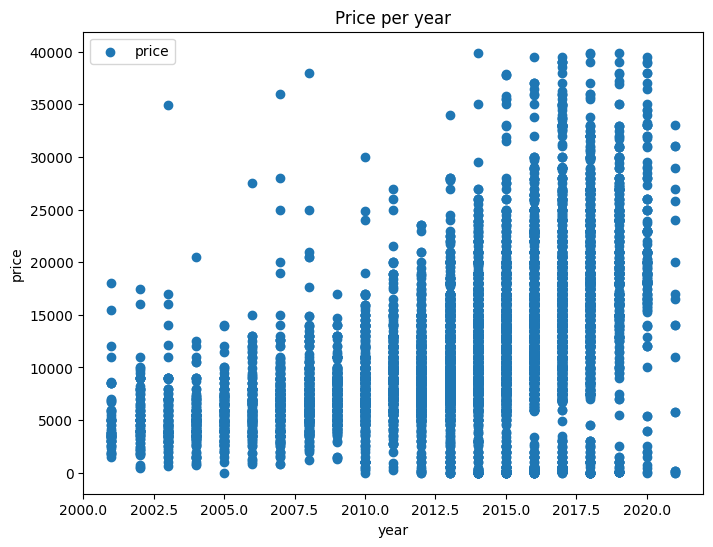

In [73]:
def plot_columns(df, x_col, y_col, title=''):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], label=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.legend()
    plt.show()


plot = plot_columns(cars_data, 'year', 'price', 'Price per year')



Vemos que o ano influência de forma crescente no preço do carro. Qualitativamente, é notório que o valor médio dos veículos aumenta na medida em que o veículo considerado é mais novo, isto é, é de um ano mais recente. Conclusão: O ano do carro parece ser importante para inferir o seu preço.

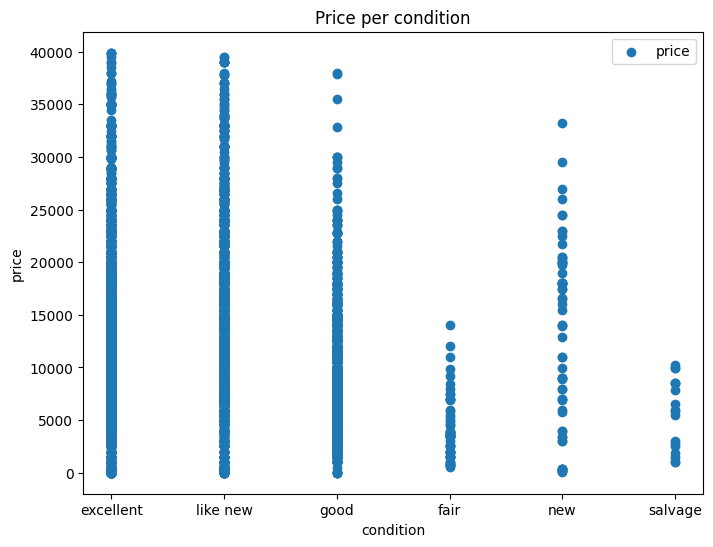

In [74]:
plot = plot_columns(cars_data, 'condition', 'price', 'Price per condition')


Vemos que a condição do veículo influência de forma crescente no preço do carro. Qualitativamente, é notório que o valor médio dos veículos aumenta na medida em que o veículo considerado em melhor estado, isto é, o preço de um veículo _excellent_ tende a ser maior do que de um veículo _fair_ . Conclusão: A condição do carro parece ser importante para inferir o seu preço.

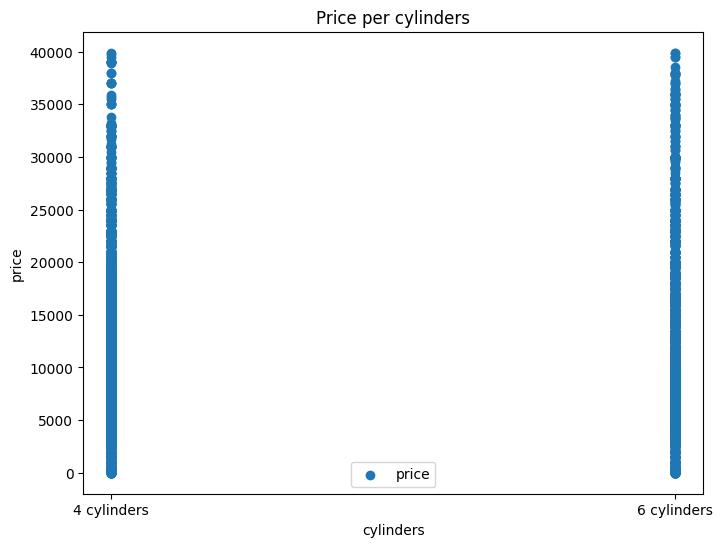

In [76]:
plot = plot_columns(cars_data, 'cylinders', 'price', 'Price per cylinders')


Vemos que o número de cilindros somente não é um parâmetro determinador do preço mesmo que talvez essa possa ser uma característica relevante para determinar esse valor. Conclusão: O número de cilindros do carro não parece ser tão importante isoladamente para inferir o seu preço.

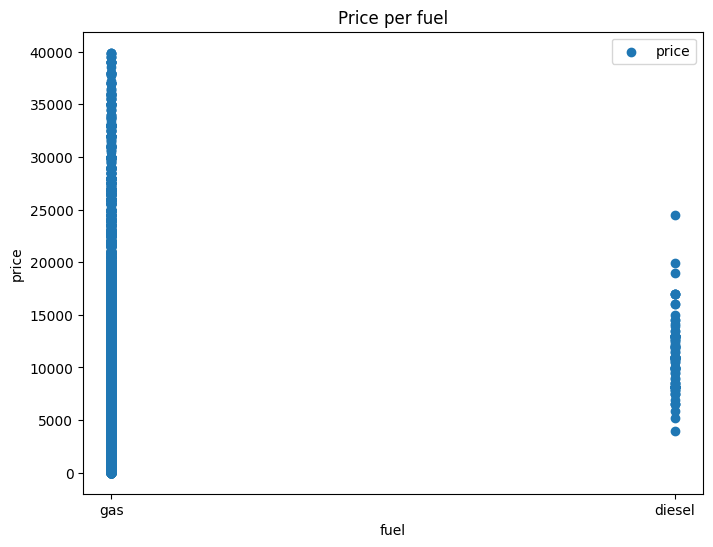

In [77]:
plot = plot_columns(cars_data, 'fuel', 'price', 'Price per fuel')


Vemos que o tipo de combustível do veículo influência de forma crescente no preço do carro. Qualitativamente, é possível ver que os veículos movidos a disel não serão nem os mais baratos e nem os mais caros. Conclusão: O típo de combustível do carro parece ser importante para inferir o seu preço ainda que o tipo sozinho não forneça uma indicação muito precisa sobre isso.

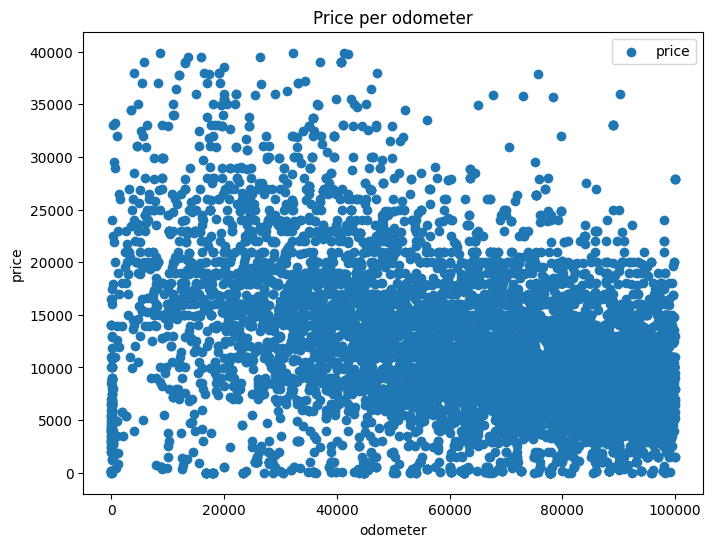

In [78]:
plot = plot_columns(cars_data, 'odometer', 'price', 'Price per odometer')


Vemos que o odometro do veículo influência de forma decrescente no preço do carro. Qualitativamente, é possível ver que os veículos com maior leitura do odômetro tendem a custar menos (vide faixa azul opaca decrescente). Conclusão: O odometro do carro parece ser importante para inferir o seu preço.

In [ ]:
plot = plot_columns(cars_data, 'transmission', 'price', 'Price per transmission')


In [ ]:
plot = plot_columns(cars_data, 'size', 'price', 'Price per size')


In [ ]:
plot = plot_columns(cars_data, 'type', 'price', 'Price per type')

In [ ]:
def RL(d, d_teste, combination, combination_teste):

    # Calculo dos parametros para uma combinação
    # N representa o número de dados para o cálculo da RL
    N = d.shape[0]
    # X é a matriz dos dados
    X = np.hstack([np.ones((N, 1)), combination])
    # R é o produto das matrizes X.T e X
    R = X.T @ X
    # o vetor p é dado pelo produto entre a matriz X.T e o vetor d
    p = X.T @ d
    # Calcule a solução wo e o erro e
    wo = np.linalg.solve(R, p)
    e = d - X @ wo

    # Calculo da "previsão" utilizando o modelo
    # N representa o número de dados para o cálculo da RL
    N_teste = d_teste.shape[0]
    # X é a matriz dos dados
    X_teste = np.hstack([np.ones((N_teste, 1)), combination_teste])
    # previsoes e erros
    previsto = []
    erro = []
    accuracy = []
    # para cada linha do conjunto de teste
    for i in range(N):
        # extrai as features da linha i
        xTeste_i = X_teste[i, :]
        # calcula o valor predito pelo modelo
        y_pred_i = xTeste_i @ wo
        # calcula o erro em relação ao valor real
        e_i = d[i] - y_pred_i
        # salva nos vetores
        previsto.append(y_pred_i)
        erro.append(e_i)
        # imprime o valor predito, o valor real e o erro
        # print(f"Valor predito: {y_pred_i}, Valor real: {dTeste[i]}, Erro: {e_i}")
    # erro da combinacao
    mse = np.sqrt(np.mean(np.array(erro)**2))
    return mse

In [ ]:
erro = [1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]

mse1 = np.sqrt(np.mean(np.array(erro)**2))
print(mse1)

erroVetor = np.array(erro)
mse2 = np.sqrt((erroVetor.T @ erroVetor)/len(erro))
print(mse2)

Com a função feita, podemos começar a trabalhar em cima dos DataFrames. Precisamos:

1. Importar os dataframes de treino e de teste (arquivos csv)
2. Substituir cada variável categórica de sua seleção por um conjunto de variáveis dummy, conforme descrito anteriormente.
3. Transformar as variáveis originais de sua seleção e / ou incluir combinações, caso julgue necessário;
4. A partir de sua seleção de dados, obter a matriz X e o vetor d, que podem ser representados como arrays do NumPy.

Pegando apenas N-1 variáveis Dummy. (N = Quantidade de categorias)

A função "pd.get_dummies" retorna todas as possíveis variáveis dummy. Contudo, precisamos de apenas N-1 variáveis dummy para cada variável categórica, já que consequentemente uma das categorias pode ser inferida como combinação linear das outras e, portanto, caso incluida no código, pode aumentar o tempo de execução de forma desnecessária:

In [ ]:
# Reduzindo a quantidade de variaveis dummy em 1 conforme enunciado.
# Configurando o "indice" das colunas do dataframe
condition = [0,1,2,3,4] 
cylinders = [6]
fuel = [8]
transmission = [10]
size = [12,13,14]
carType = [16,17,18]
fabrication = [20]
odometer = [21]
age = [22] #Criamos
mileage_per_year = [23] #Criamos

# Vetor com todas as colunas possiveis no DataFrame organizadas por tipo
avaliabelVariablesIndexes = [condition,cylinders,fuel,transmission,size,carType,fabrication,odometer,age,mileage_per_year]

Para encontrar-mos o melhor modelo de regressão linear possível, queremos tentar todas as combinações possíveis entre as variáveis que possuimos, avaliar cada modelo pelo erro quadrático e então em tese encontraremos o melhor modelo possível com nossas variáveis escolhidas.

Para isso vamos primeiro criar todas as permutações possíveis:

In [ ]:
# Criando todas as permutações possíveis entre as colunas do DataFrame
combinations = [] # É uma lista cujo i-ésimo elemento guarda os indices das colunas referentes a uma possível permutação
for i in range(2, len(avaliabelVariablesIndexes) + 1):
    for subset in itertools.combinations(avaliabelVariablesIndexes, i):
        combinations.append(list(itertools.chain.from_iterable(subset)))

Criado o vetor de combinações, podemos agora fazer a regressão linear para cada uma delas e encontrar o menor erro entre todos os modelos

In [ ]:
# Chamando a regressão linear para cada uma das combinações possíveis
# Salvamos apenas quando uma regressão possui uma resposta 'melhor' que uma anterior
min_mse = np.inf
for i in range(len(combinations)-1):
    try:
        mse = RL(d_train, d_test, X_train.iloc[:, combinations[i]], X_test.iloc[:, combinations[i]])
        if mse < min_mse:
            print("Erro:", mse, "Feature Combo:", combinations[i])
            min_mse = mse
            combo_number = i
            best_features = list(combinations[i])
    except np.linalg.LinAlgError:
        continue

# Print do melhor resultado
print("Best feature combination: ", best_features)
print("Best feature number:", combo_number)
print("Minimum MSE: ", min_mse)